In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\Images4ClassesPerPersonSVM'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [132]:
DATADIR = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\ImagesAllPerPersonSVM\\train'
DATADIRTEST = 'C:\\Users\\Joeri Van Cauwelaert\\Desktop\\Masterthesis\\machineLearning\\ImagesAllPerPersonSVM\\test'
CATEGORIES = ['Sitting','SittingPelvicRF','SittingMPelvicRF','SittingSPelvicRF','SittingPelvicRB','SittingSPelvicRB','SittingMPelvicRB','Standing','StandingPelvicRF','StandingSPelvicRF','StandingMPelvicRF','StandingMPelvicRB','StandingSPelvicRB','StandingPelvicRB']
#CATEGORIES = ['Sitting','SittingPelvicRF','SittingPelvicRB','Standing','StandingPelvicRF','StandingPelvicRB']
IMG_SIZE=100

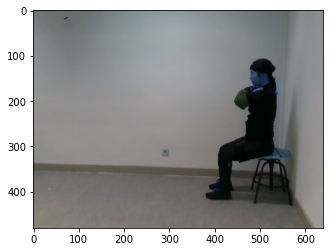

In [133]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [134]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data() 

In [135]:
print(len(training_data))

2880


In [136]:
lenofimage = len(training_data)

In [137]:
test_data=[]
def create_test_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIRTEST, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data() 

In [138]:
print(len(test_data))

1920


In [139]:
lenofimagetest = len(test_data)

In [140]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [141]:
X_test=[]
y_test=[]

for categories, label in test_data:
    X_test.append(categories)
    y_test.append(label)
X_test= np.array(X_test).reshape(lenofimagetest,-1)

In [142]:
X_test.shape

(1920, 30000)

In [143]:
X = X/255.0

In [144]:
X_test = X_test/255.0

In [145]:
X[1]

array([0.43921569, 0.4745098 , 0.47058824, ..., 0.62745098, 0.60392157,
       0.57647059])

In [146]:
y=np.array(y)

In [147]:
y_test= np.array(y_test)

In [148]:
y.shape

(2880,)

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [149]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X, y)

SVC(gamma='auto', kernel='linear')

In [150]:
y2 = svc.predict(X_test)

In [151]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.16875


In [152]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.20      0.26      0.22       240
           1       0.01      0.03      0.02       120
           2       0.00      0.00      0.00       120
           3       0.12      0.12      0.12       120
           4       0.20      0.35      0.25       120
           5       0.15      0.03      0.05       120
           6       0.00      0.00      0.00       120
           7       0.30      0.62      0.41       240
           8       0.04      0.02      0.02       120
           9       0.03      0.03      0.03       120
          10       0.17      0.03      0.04       120
          11       0.02      0.01      0.01       120
          12       0.17      0.07      0.10       120
          13       0.15      0.25      0.19       120

    accuracy                           0.17      1920
   macro avg       0.11      0.13      0.11      1920
weighted avg       0.13      0.17      0.13      192

C:\Users\Joeri Van Cauwelaert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joeri Van Cauwelaert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Joeri Van Cauwelaert\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [153]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [154]:
result

,original,predicted
0,0,4
1,0,4
2,0,4
3,0,4
4,0,4
...,...,...
1915,13,10
1916,13,10
1917,13,9
1918,13,9


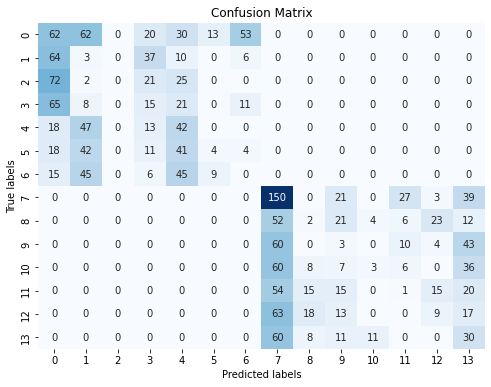

In [155]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have trained your SVM classifier (svc) and have test data (X_test, y_test)

# Make predictions on test data
y_pred = svc.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")

# Save the confusion matrix plot as an image file
plt.savefig('confusion_matrix.png')

plt.show()

In [ ]:
from joblib import dump

# Assuming svc is your trained SVM classifier
# Save the trained model to a file
dump(svc, 'svm_model.joblib')

In [ ]:
from joblib import load

# Load the saved model from file
loaded_model = load('svm_model.joblib')

In [48]:
# Initialize the camera
cap = cv2.VideoCapture(0)  # Use the default camera (change to the appropriate index if you have multiple cameras)

# Load your image classifier model
classifier = svc

In [49]:

    # Capture frame-by-frame
ret, frame = cap.read()
#_, png_image = cv2.imencode('.png', frame)
cv2.imwrite('captured_frame.png', frame)
png_array = cv2.imread('captured_frame.png')
preprocessed_frame = cv2.resize(png_array,(IMG_SIZE,IMG_SIZE))
X=[]
X= np.array(preprocessed_frame).reshape(1,-1)
print(preprocessed_frame.shape)
    # Classify the preprocessed frame using your image classifier model
prediction = classifier.predict(X)

    # Display the frame and classification result
cv2.imshow('Frame', frame)
print('Prediction:', prediction)

    # Wait for 1 second (1000 milliseconds) and check for key press

# Release the camera and close all OpenCV windows
#cap.release()
cv2.destroyAllWindows()

(100, 100, 3)
Prediction: [0]
